<a href="https://colab.research.google.com/github/sof1a03/KDE-group6/blob/main/users_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# A function to get the missing values count and it's percentage
def missing_values(df):
  """
  Description : This function takes a data frame as an input and gives missing value count and its percentage as an output
  """
  miss = df.isnull().sum() # finding the missing values.
  per = df.isnull().mean() # finding mean/ Average of missing values.
  df = pd.concat([miss,per*100],keys = ['Missing_Values','Percentage'], axis = 1) # concatenating both of them using concat method of pandas module.
  return df # returning dataframe

In [3]:
users = pd.read_csv("Users.csv")

In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [6]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [7]:
#Percentage of missing values in users_df
print(users.isnull().sum()/len(users)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


* The 39.7% of values in the 'Age' column are missing/NaN values
* The maximum value in the 'Age' column is 244. This is certainly an outlier

<Axes: xlabel='Age'>

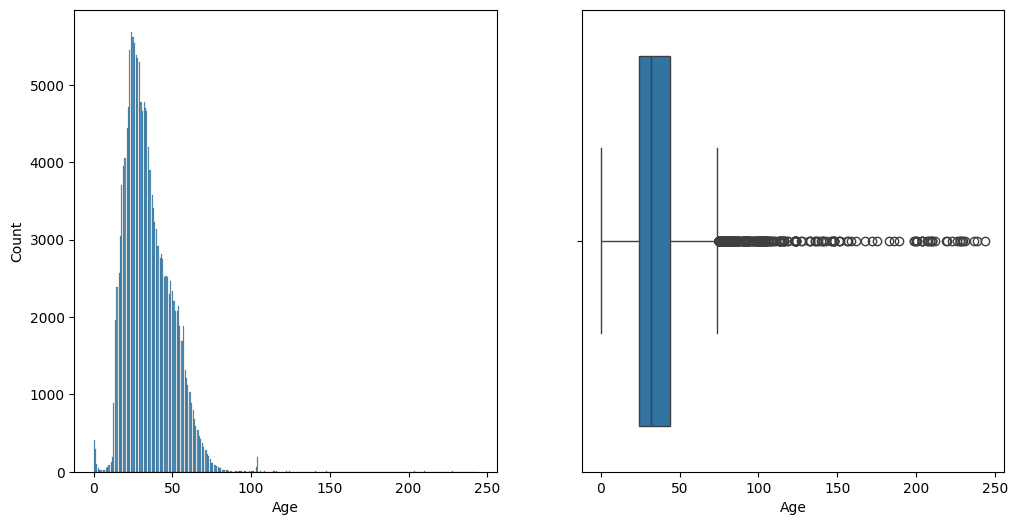

In [8]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users)

* Age distribution of positively skewed
* Most of the users are from the age group 25-50
* It is highly unlikely to have users under the age of 4 and above 95.The peaks near 0 and 100 in the kdeplot indicates that there are some outlier values in the 'Age' column

In [9]:
#replacing the outliers in 'Age' with NaN value
users.loc[(users['Age']>95)|(users['Age']<4),'Age']=np.nan

In [10]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users['Age'].describe()

The number of missing values is  112001


,Age
count,166857.000000
mean,34.734222
std,13.621521
min,4.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,95.000000


In [11]:
# create a normal distribution pd.Series to fill Nan values with
normal_age_series = pd.Series(np.random.normal(loc=users.Age.mean(), scale=users.Age.std(), size=users[users.Age.isna()]['User-ID'].count()))

# take the absolute value of temp_age_series
abs_age_series=round(np.abs(normal_age_series),0)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users = users.sort_values('Age',na_position='first').reset_index(drop=True)
users.Age.fillna(abs_age_series, inplace = True)

<ipython-input-11-e2c0e40fddab>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users.Age.fillna(abs_age_series, inplace = True)


In [12]:
users.Age.describe()

,Age
count,278858.000000
mean,34.726918
std,13.574010
min,0.000000
25%,25.000000
50%,33.000000
75%,44.000000
max,101.000000


In [13]:
#percentage of missing values in 'Age' column
(users['Age'].isnull().sum()/len(users))*100

0.0

In [14]:
def age_group(age):
  '''
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [15]:
users['Age_group']=users['Age'].apply(lambda x: age_group(x))

<ipython-input-16-3d042c3a599d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(users['Age_group'],palette='Set2')


<Axes: xlabel='count', ylabel='Age_group'>

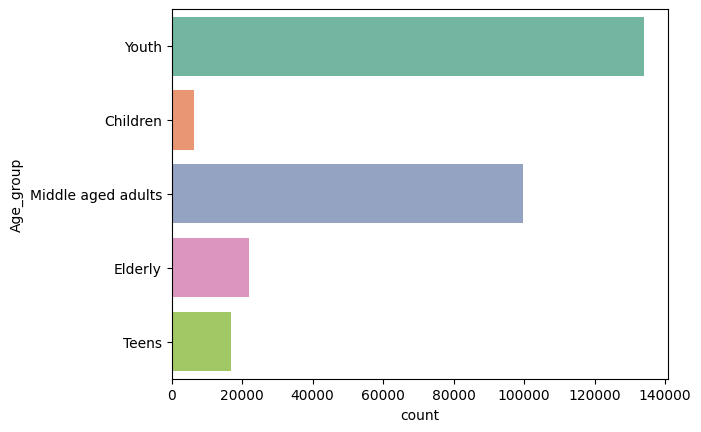

In [16]:
#Age distribution of users
sns.countplot(users['Age_group'],palette='Set2')

In [17]:
#number of unique values in 'Location'
users['Location'].nunique()

57339

* there's definitely too many locations: it's needed to make some cleaning.


In [18]:
users['Country'] = users['Location'].str.split(',').str[-1].str.strip().str.lower()
users['Country'] = users['Country'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x).strip())
# users['Country'].to_csv('countries.txt', index=False, header=False)
users['Country'].unique()

array(['usa', 'russia', 'unitedkingdom', 'canada', 'germany',
       'distritofederal', 'italy', 'australia', '', 'finland', 'spain',
       'slovenia', 'peru', 'vietnam', 'portugal', 'pakistan', 'denmark',
       'uae', 'greece', 'colombia', 'india', 'quit', 'lj', 'sweden',
       'norway', 'philippines', 'switzerland', 'turkey', 'brazil',
       'london', 'bulgaria', 'mexico', 'austria', 'malaysia', 'france',
       'newzealand', 'albania', 'egypt', 'iran', 'argentina',
       'netherlands', 'saudiarabia', 'poland', 'chile', 'indonesia',
       'paraguay', 'afghanistan', 'estonia', 'clackamas', 'lesotho',
       'yugoslavia', 'taiwan', 'china', 'costarica',
       'britishvirginislands', 'nigeria', 'singapore', 'ireland',
       'croatia', 'israel', 'romania', 'ethiopia', 'iceland',
       'southafrica', 'calabria', 'alderney', 'puertorico', 'hongkong',
       'latvia', 'luxembourg', 'na', 'srilanka', 'thailand', 'csa',
       'phils', 'kazakhstan', 'japan', 'morocco', 'scotland', 'u

* It is visible that most of the countries are not a valid value: we're gonna filter them.

In [19]:
# Standardizing country names
users.loc[users['Country'].isin(['afganstandholla']), 'Country'] = 'afghanistan'
users.loc[users['Country'].isin(['algrie','lalgrie']), 'Country'] = 'algeria'
users.loc[users['Country'].isin(['andorra"']), 'Country'] = 'andorra'
users.loc[users['Country'].isin(['laargentina']), 'Country'] = 'argentina'
users.loc[users['Country'].isin(['asturies','austria','az']), 'Country'] = 'austria'
users.loc[users['Country'].isin(['australii', 'autralia', 'westernaustralia', 'australia"']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['belgi','belgique','labelgique']), 'Country'] = 'belgium'
users.loc[users['Country'].isin(['brasil']), 'Country'] = 'brazil'
users.loc[users['Country'].isin(['bosniaandherzegovina','bosnia']), 'Country'] = 'bosnia and herzegovina'
users.loc[users['Country'].isin(['britishvirginislands']), 'Country'] = 'british virgin islands'
users.loc[users['Country'].isin(['bruneidarussalam']), 'Country'] = 'brunei'
users.loc[users['Country'].isin(['burlington','can','canda','canadaeh','cananda','lecanada','ilcanada']), 'Country'] = 'canada'
users.loc[users['Country'].isin(['chinaöð¹ú', 'chinaöð¹ú', 'peoplesrepublicofchina','roc','chian','chinapeoplesrepublic','zhengjiang','prchina','cnina','lachineeternelle', 'lachineternelle', 'liaoning', 'liushi']), 'Country'] = 'china'
users.loc[users['Country'].isin(['capeverde']), 'Country'] = 'cape verde'
users.loc[users['Country'].isin(['czechrepublic']), 'Country'] = 'czech republic'
users.loc[users['Country'].isin(['copenhagen']), 'Country'] = 'denmark'
users.loc[users['Country'].isin(['holysee','vaticancity']), 'Country'] = 'holy see'
users.loc[users['Country'].isin(['equatorialgeuinea','guinea','guineabissau']), 'Country'] = 'equatorial guinea'
users.loc[users['Country'].isin(['fifi']), 'Country'] = 'fiji'
users.loc[users['Country'].isin(['deutschland', 'geermany', 'germay','bavaria','bademnwrtemberg','badenwrttemberg','de','der','deutschesreich','deutschland','dfg']), 'Country'] = 'germany'
users.loc[users['Country'].isin(['citrus','cyprus','greecehellas']), 'Country'] = 'greece'
users.loc[users['Country'].isin(['españa', 'espaã±a', 'catalunyaspain','catalonia','catalunya','orense','fortaleza','catalunyacatalonia','catalunyaspain',
                                 'espaa','espanhagaliza','gabon','galiza','galizaneghra','madrid','lleida','sierraleone']), 'Country'] = 'spain'
users.loc[users['Country'].isin(['hongkong']), 'Country'] = 'hong kong'
users.loc[users['Country'].isin(['india"', 'indiai']), 'Country'] = 'india'
users.loc[users['Country'].isin(['italy"', 'italia', 'italien', 'itlay','basilicata','calabria','ferrara','fontana','italia', 'italien', 'itlay', 'milano',
                                 'lazio', 'lecce', 'lombardia', 'litalia','rosello','rosario','toscana','repsanmarino','roma','sanmarino','sardegna', 'sardinia','sicilia']), 'Country'] = 'italy'
users.loc[users['Country'].isin(['dublin','northernireland','irland']), 'Country'] = 'ireland'
users.loc[users['Country'].isin(['isreal']), 'Country'] = 'israel'
users.loc[users['Country'].isin(['lafrance','basquecountry','cotedivoire']), 'Country'] = 'france'
users.loc[users['Country'].isin(['kz']), 'Country'] = 'kazakhstan'
users.loc[users['Country'].isin(['lemadagascar']), 'Country'] = 'madagascar'
users.loc[users['Country'].isin(['méxico', 'mico']), 'Country'] = 'mexico'
users.loc[users['Country'].isin(['burma']), 'Country'] = 'myanmar'
users.loc[users['Country'].isin(['holland', 'netherlandsantilles', 'nederlands', 'nl', 'holland', 'thenetherlands']), 'Country'] = 'netherlands'
users.loc[users['Country'].isin(['macedonia']), 'Country'] = 'north macedonia'
users.loc[users['Country'].isin(['malaysia', 'malaysian']), 'Country'] = 'malaysia'
users.loc[users['Country'].isin(['maroc']), 'Country'] = 'morocco'
users.loc[users['Country'].isin(['marshallislands']), 'Country'] = 'marshall islands'
users.loc[users['Country'].isin(['mexico', 'mxico', 'monterrey', 'mrida']), 'Country'] = 'mexico'
users.loc[users['Country'].isin(['mozambique', 'moambique']), 'Country'] = 'mozambique'
users.loc[users['Country'].isin(['antiguabarbuda','antiguaandbarbuda']), 'Country'] = 'antigua and barbuda'
users.loc[users['Country'].isin(['newzealand', 'nz']), 'Country'] = 'new zealand'
users.loc[users['Country'].isin(['northkorea']), 'Country'] = 'north korea'
users.loc[users['Country'].isin(['papuanewguinea']), 'Country'] = 'papua new guinea'
users.loc[users['Country'].isin(['republicofpanama']), 'Country'] = 'panama'
users.loc[users['Country'].isin(['per',]), 'Country'] = 'peru'
users.loc[users['Country'].isin(['philippine', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines','thephilippines']), 'Country'] = 'philippines'
users.loc[users['Country'].isin(['poland', 'polska']), 'Country'] = 'poland'
users.loc[users['Country'].isin(['puertorico', 'pr']), 'Country'] = 'puerto rico'
users.loc[users['Country'].isin(['qatar']), 'Country'] = 'qatar'
users.loc[users['Country'].isin(['russia', 'russianfederation']), 'Country'] = 'russia'
users.loc[users['Country'].isin(['ksa']), 'Country'] = 'saudi arabia'
users.loc[users['Country'].isin(['srilanka']), 'Country'] = 'sri lanka'
users.loc[users['Country'].isin(['suisse', 'lasuisse', 'lasvizzera']), 'Country'] = 'switzerland'
users.loc[users['Country'].isin(['capemay','capetown','southafrica','rsa','safrica']), 'Country'] = 'south africa'
users.loc[users['Country'].isin(['southkorea','republicofkorea','scorea']), 'Country'] = 'south korea'
users.loc[users['Country'].isin(['saudiaarabia', 'saudiarabia']), 'Country'] = 'saudi arabia'
users.loc[users['Country'].isin(['singapore', 'singaporeunitedkingdom']), 'Country'] = 'singapore'
users.loc[users['Country'].isin(['slovakia', 'slovakrepublik']), 'Country'] = 'slovakia'
users.loc[users['Country'].isin(['turkey"']), 'Country'] = 'turkey'
users.loc[users['Country'].isin(['uae','ua']), 'Country'] = 'united arab emirates'
users.loc[users['Country'].isin(['srilanka', 'srilankana']), 'Country'] = 'sri lanka'
users.loc[users['Country'].isin(['serbia', 'serbiaandmontenegro', 'serbiamontenegro']), 'Country'] = 'serbia'
users.loc[users['Country'].isin(['unitedkindgdom', 'unitedkindgonm', 'hamilton','hampden','unitedkingdom','gb', 'uk', 'austbritania','scotland',
                                 'london','camden','england','englanduk','english','essex','wales']), 'Country'] = 'united kingdom'
users.loc[users['Country'].isin(['clackamas','coutrenay','csa','maine','rutherford','goodoldusa',
    'unite states', '01776', '02458', '19104', '23232', '30064', '85021', '87510', 'unitedsates','shelby','stclair','sthelena',
    'unitedstaes', 'unitedstate', 'unitedstatea', 'unitedstated', 'america','gooldusa','goteborg','granville',
    'unitedstatedofamerica', 'unitedstates', 'unitedstatesofamerica', 'us', 'usofa','spotsylvania',
    'usvirginislands', 'usacanada', 'usacurrentlylivinginengland', 'uusa', 'usaa','guernsey','northcarolina','ohio','victoria',
    'wonderfulusa', 'california', 'orangeco','baltimore','california','disgruntledstatesofamerica','sanmateo','santabarbara','saotomeandprincipe',
    'hernando', 'hidalgo', 'hillsborough', 'houston', 'jackson', 'johnson', 'kern', 'sanbernardino','sanfranicsco',
    'lawrenceville', 'lee', 'livingston', 'maine', 'maracopa', 'saintloius','saintlucia', 'saintluica','saintvincentandthegrenadines', 'stvincentandthegrenadines',
    'maricopa', 'marrion', 'minnehaha', 'missouri', 'monroe', 'orangeco', 'pasco', 'unitestates','losestadosunidosdenorteamerica','palmbeach',
    'pender', 'phila', 'pinallas', 'polk', 'princewilliam', 'pueblo', 'osceola','stthomasi','texas','trinidad', 'trinidadandtobago', 'trinidadtobago','hungaryandusa','oakland','nyc'
]), 'Country'] = 'usa'
users.loc[users['Country'].isin(['sultanateofoman']), 'Country'] = 'oman'
users.loc[users['Country'].isin(['swaziland', 'swazilandia']), 'Country'] = 'eswatini'
users.loc[users['Country'].isin(['thailand', 'thailoand']), 'Country'] = 'thailand'
users.loc[users['Country'].isin(['thegambia']), 'Country'] = 'gambia'
users.loc[users['Country'].isin(['turkei', 'turkey','trkiye']), 'Country'] = 'turkey'
users.loc[users['Country'].isin(['ukrain', 'ukraine']), 'Country'] = 'ukraine'
users.loc[users['Country'].isin(['dominicanrepublic']), 'Country'] = 'dominican republic'
users.loc[users['Country'].isin(['unitedarabemirates']), 'Country'] = 'united arab emirates'
users.loc[users['Country'].isin(['urugua', 'uruguay']), 'Country'] = 'uruguay'
users.loc[users['Country'].isin(['costarica']), 'Country'] = 'costa rica'
users.loc[users['Country'].isin(['"','','id','rmi','pa','quit','lj','valtesse','tdzimi','3265422269','2001322269','3265422269','5057chadwickct', 'smith','solomonislands','solano','somewhereinspace', 'space','saintkittsandnevis','adsgfdr','ahrensburg','alderney','aroostook', 'aotearoa', 'allen', 'amalurra', 'ahrensburg', 'alachua','aroostook', 'aruba', 'xxxxxx',
                                'azerbaijan','isleofman','baxter','bbbzzzzz','bell','rapides','faraway','my','travelling','tyrtyrt','wmalaysia','benin','bergued','bernalillo','bfe','bih','bkk','bladen','bucks','butler','c','ca','cadd0','carribeansea','carter','cass','universe', 'nowhere', 'x', 'y', 'a', 'öð¹ú', 'the', 'unknown', 'na', 'aaa', 'z',
                                 'somewhereinspace', '[]','cn','collin', 'space', 'naontheroad', 'inyourheart', 'caymanislands','channelislands','eastafrica','eeuu','effingham','farawy','faroeislands','fernandodelamora',
                                 'homeofthevan', 'everywhereandanywhere', 'strongbadia', 'mordor', 'cted','strongbadia','dauphin','davidson','dekalb','distritofederal','diy','dijbouti','doodedoo'
                                 'evilempire','harvatija','heaven','hereandthere','homeofthevan', 'hornyonic', 'inputerror', 'inyourheart', 'k1c7b1', 'l', 'lane', 'mordor', 'nomore', 'none', 'ouranos', 'unknown', 'petrolwarnation','pippo', 'pistlavakia', 'fairyland','country','guam','fortbend','framingham','fred','fredonialandofthebraveandfree','frome','fulton', 'unknown',
                                 'aaa','commonwealthofnorthernmarianaislands','comoros','cook','europa','europe','euskadi','euskalherria','everywhereandanywhere','evilempire','exactlywhereiam','fairyland',
                                 'doodedoo','caribbeansea','hennipen','lake','windham','thegreatwhitenorth','auckland','morgan','slo','lkjlj','richmondcountry','wood','vanwert','lornsenland','faraway','unit','newlondon','u','oyo','thing','wereglobal','whatcom',
                              'queenspark','rice','ust','nrw','ventura','nyhamnslge','clinton','cherokee','washtenaw','elsalvador','americansamoa','prc','nh','venturacounty','ysa','theworldtomorrow','burkinafasu','henry','onondaganation','vorce','neverland','westyorkshire','uyo','hug','ussurfing','yanhill','buncombe','in','courtenay','xinyu','yakima','yunling' ]), 'Country'] = 'unknown'


In [20]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [21]:
#Dropping the column 'Location'
users.drop('Location',axis=1,inplace=True)
users.columns

Index(['User-ID', 'Age', 'Age_group', 'Country'], dtype='object')

In [22]:
users.Country.value_counts()

,count
Country,
USA,139884
CANADA,21666
UNITED KINGDOM,18655
GERMANY,17111
SPAIN,13381
...,...
KIRIBATI,1
WORCESTER,1
SOMALIA,1


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User-ID    278858 non-null  int64  
 1   Age        278858 non-null  float64
 2   Age_group  278858 non-null  object 
 3   Country    278858 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ MB


In [24]:
users.to_csv('users_cleaned.csv',index=False)